In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [79]:
filename ='/Users/mr.jpu/fuse-project-1/dataset/original_dataset/pd_speech_features.csv'
dataframe = pd.read_csv(filename)

In [80]:
dataframe.shape

(757, 755)

In [4]:
dataframe.head()

Unnamed: 0 Unnamed: 1 Baseline Features Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0         id     gender               PPE        DFA       RPDE  numPulses   
1          0          1           0.85247    0.71826    0.57227        240   
2          0          1           0.76686    0.69481    0.53966        234   
3          0          1           0.85083    0.67604    0.58982        232   
4          1          0           0.41121    0.79672    0.59257        178   

         Unnamed: 6        Unnamed: 7          Unnamed: 8    Unnamed: 9  ...  \
0  numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
1               239        0.00806353            8.68E-05       0.00218  ...   
2               233       0.008258256            7.31E-05       0.00195  ...   
3               231        0.00833959            6.04E-05       0.00176  ...   
4               177       0.010857733         0.000182739       0.00419  ...   

                Unnamed: 745               Unnamed: 746  \
0  tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29   
1                      1.562                     2.6445   
2                     1.5589                     3.6107   
3                     1.5643                     2.3308   
4                     3.7805                     3.5664   

                Unnamed: 747               Unnamed: 748  \
0  tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31   
1                     3.8686                     4.2105   
2                    23.5155                    14.1962   
3                     9.4959                    10.7458   
4                     5.2558                    14.0403   

                Unnamed: 749               Unnamed: 750  \
0  tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33   
1                     5.1221                     4.4625   
2                    11.0261                     9.5082   
3                    11.0177                     4.8066   
4                     4.2235                     4.6857   

                Unnamed: 751               Unnamed: 752  \
0  tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35   
1                     2.6202                     3.0004   
2                     6.5245                     6.3431   
3                     2.9199                     3.1495   
4                      4.846                      6.265   

                Unnamed: 753 Unnamed: 754  
0  tqwt_kurtosisValue_dec_36        class  
1                    18.9405            1  
2                     45.178            1  
3                     4.7666            1  
4                     4.0603            1  

[5 rows x 755 columns]

In [5]:
new_header = dataframe.iloc[0] #grab the first row for the header
dataframe = dataframe[1:] #take the data less the header row
dataframe.columns = new_header #set the header row as the df header

In [6]:
dataframe.head()

0 id gender      PPE      DFA     RPDE numPulses numPeriodsPulses  \
1  0      1  0.85247  0.71826  0.57227       240              239   
2  0      1  0.76686  0.69481  0.53966       234              233   
3  0      1  0.85083  0.67604  0.58982       232              231   
4  1      0  0.41121  0.79672  0.59257       178              177   
5  1      0   0.3279  0.79782  0.53028       236              235   

0 meanPeriodPulses stdDevPeriodPulses locPctJitter  ...  \
1       0.00806353           8.68E-05      0.00218  ...   
2      0.008258256           7.31E-05      0.00195  ...   
3       0.00833959           6.04E-05      0.00176  ...   
4      0.010857733        0.000182739      0.00419  ...   
5      0.008161574        0.002668863      0.00535  ...   

0 tqwt_kurtosisValue_dec_28 tqwt_kurtosisValue_dec_29  \
1                     1.562                    2.6445   
2                    1.5589                    3.6107   
3                    1.5643                    2.3308   
4                    3.7805                    3.5664   
5                    6.1727                    5.8416   

0 tqwt_kurtosisValue_dec_30 tqwt_kurtosisValue_dec_31  \
1                    3.8686                    4.2105   
2                   23.5155                   14.1962   
3                    9.4959                   10.7458   
4                    5.2558                   14.0403   
5                    6.0805                    5.7621   

0 tqwt_kurtosisValue_dec_32 tqwt_kurtosisValue_dec_33  \
1                    5.1221                    4.4625   
2                   11.0261                    9.5082   
3                   11.0177                    4.8066   
4                    4.2235                    4.6857   
5                    7.7817                   11.6891   

0 tqwt_kurtosisValue_dec_34 tqwt_kurtosisValue_dec_35  \
1                    2.6202                    3.0004   
2                    6.5245                    6.3431   
3                    2.9199                    3.1495   
4                     4.846                     6.265   
5                    8.2103                    5.0559   

0 tqwt_kurtosisValue_dec_36 class  
1                   18.9405     1  
2                    45.178     1  
3                    4.7666     1  
4                    4.0603     1  
5                    6.1164     1  

[5 rows x 755 columns]

# Data Extraction from the dataset
Baseline Features: Column-3 to Column-23 Intensity Parameters: Col24 to Col26 Formant Frequencies: Col27 to Col30 Bandwidth Parameters: Col31 to Col34 Vocal Fold: Col35 to Col56 MFCC: Col57 to Col140 Wavelet Features: Col141 to Col322 TQWT Features: Col323 to Col754 Class: Col755

Refer Research Page: 6 - 9

In [7]:
baseline = dataframe.iloc[:,2:23]
intensity = dataframe.iloc[:,23:26]
frequency = dataframe.iloc[:,26:30]
bandwidth = dataframe.iloc[:,30:34]
vocal = dataframe.iloc[:,34:56]
mfcc = dataframe.iloc[:,56:140]
wavelet = dataframe.iloc[:,140:322]
tqwt = dataframe.iloc[:,322:755]
y = dataframe['class']

# Baseline Columns


In [8]:
mean_value_columns = [cols for cols in baseline.columns if cols.__contains__('mean')]
std_value_columns = [cols for cols in baseline.columns if cols.__contains__('std')]
other_columns = list(set(baseline.columns) - set(mean_value_columns) - set(std_value_columns))

In [27]:
extracted_df = baseline[other_columns].join([intensity,frequency,bandwidth,y])
extracted_df.shape

(756, 28)

# Exploratory_data_analysis

In [82]:
extracted_df.columns #checking columns

Index(['locPctJitter', 'locAbsJitter', 'RPDE', 'ddaShimmer', 'numPulses',
       'DFA', 'apq3Shimmer', 'ppq5Jitter', 'rapJitter', 'ddpJitter',
       'locDbShimmer', 'numPeriodsPulses', 'PPE', 'apq5Shimmer', 'locShimmer',
       'apq11Shimmer', 'minIntensity', 'maxIntensity', 'meanIntensity', 'f1',
       'f2', 'f3', 'f4', 'b1', 'b2', 'b3', 'b4', 'class'],
      dtype='object')

In [83]:
extracted_df= extracted_df.astype(float) #converting data types from object to float
extracted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   locPctJitter      756 non-null    float64
 1   locAbsJitter      756 non-null    float64
 2   RPDE              756 non-null    float64
 3   ddaShimmer        756 non-null    float64
 4   numPulses         756 non-null    float64
 5   DFA               756 non-null    float64
 6   apq3Shimmer       756 non-null    float64
 7   ppq5Jitter        756 non-null    float64
 8   rapJitter         756 non-null    float64
 9   ddpJitter         756 non-null    float64
 10  locDbShimmer      756 non-null    float64
 11  numPeriodsPulses  756 non-null    float64
 12  PPE               756 non-null    float64
 13  apq5Shimmer       756 non-null    float64
 14  locShimmer        756 non-null    float64
 15  apq11Shimmer      756 non-null    float64
 16  minIntensity      756 non-null    float64
 1

In [29]:
#checking for missing values
extracted_df.isnull().sum()

locPctJitter        0
locAbsJitter        0
RPDE                0
ddaShimmer          0
numPulses           0
DFA                 0
apq3Shimmer         0
ppq5Jitter          0
rapJitter           0
ddpJitter           0
locDbShimmer        0
numPeriodsPulses    0
PPE                 0
apq5Shimmer         0
locShimmer          0
apq11Shimmer        0
minIntensity        0
maxIntensity        0
meanIntensity       0
f1                  0
f2                  0
f3                  0
f4                  0
b1                  0
b2                  0
b3                  0
b4                  0
class               0
dtype: int64

In [30]:
extracted_df.describe()

locPctJitter  locAbsJitter        RPDE  ddaShimmer   numPulses  \
count    756.000000  7.560000e+02  756.000000  756.000000  756.000000   
mean       0.002324  1.673391e-05    0.489058    0.103125  323.972222   
std        0.002628  2.290134e-05    0.137442    0.067097   99.219059   
min        0.000210  6.860000e-07    0.154300    0.010040    2.000000   
25%        0.000970  5.260000e-06    0.386537    0.053538  251.000000   
50%        0.001495  9.530000e-06    0.484355    0.083945  317.000000   
75%        0.002520  1.832500e-05    0.586515    0.134000  384.250000   
max        0.027750  2.564800e-04    0.871230    0.391540  907.000000   

              DFA  apq3Shimmer  ppq5Jitter   rapJitter   ddpJitter  ...  \
count  756.000000   756.000000  756.000000  756.000000  756.000000  ...   
mean     0.700414     0.034375    0.001159    0.000605    0.001815  ...   
std      0.069718     0.022366    0.001677    0.000981    0.002942  ...   
min      0.543500     0.003350    0.000050    0.000020    0.000050  ...   
25%      0.647053     0.017843    0.000370    0.000150    0.000450  ...   
50%      0.700525     0.027980    0.000650    0.000280    0.000840  ...   
75%      0.754985     0.044665    0.001253    0.000650    0.001952  ...   
max      0.852640     0.130510    0.018320    0.011050    0.033150  ...   

       meanIntensity           f1           f2           f3           f4  \
count     756.000000   756.000000   756.000000   756.000000   756.000000   
mean       73.997008   647.174519  1233.852088  2562.425251  3547.259244   
std         7.018006   134.957916   169.090402   393.315598   347.864299   
min        39.984109   237.149533   761.357661  1411.231297  2471.996546   
25%        70.920615   562.879119  1117.316190  2380.426103  3288.644496   
50%        76.855313   641.181498  1215.344125  2612.204198  3544.012403   
75%        78.718785   737.222678  1339.826741  2831.959198  3807.332055   
max        85.096353  1015.524047  1922.747225  3475.648017  4482.258531   

                b1           b2           b3           b4       class  
count   756.000000   756.000000   756.000000   756.000000  756.000000  
mean    213.363237   297.174077   536.821070   506.604856    0.746032  
std     306.976045   450.125488   754.341717   658.326606    0.435568  
min      13.525000    16.428803    21.164397    22.842528    0.000000  
25%      90.939702   102.856320   152.783110   170.741827    0.000000  
50%     141.610973   159.991186   265.964575   307.971279    1.000000  
75%     234.098376   299.912765   518.822036   557.628796    1.000000  
max    4744.875736  4262.170070  6116.039922  5804.342078    1.000000  

[8 rows x 28 columns]

# Univariate Analysis

# Count Plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


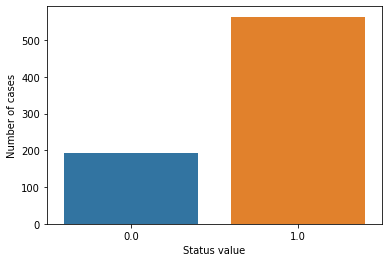

In [31]:
sns.countplot(extracted_df['class'].values)
plt.xlabel("Status value")
plt.ylabel("Number of cases")
plt.show()

# Distribution Plot

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='f1', ylabel='Density'>

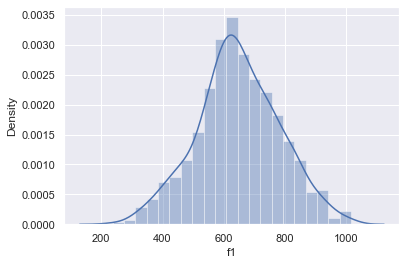

In [87]:
sns.distplot(extracted_df['f1'])

# Boxplot

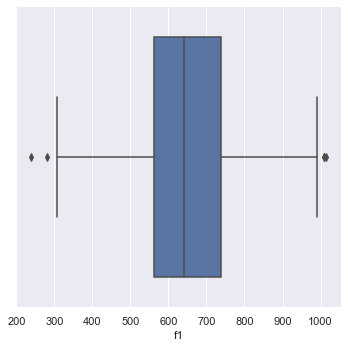

In [95]:
sns.catplot(x='f1',kind='box',data= extracted_df)

# Skewness

Skewness is a measure of asymmetry or distortion of symmetric distribution. It measures the deviation of the given distribution of a random variable from a symmetric distribution, such as normal distribution.

1. Positive Skewness
If the given distribution is shifted to the left and with its tail on the right side, it is a positively skewed distribution. It is also called the right-skewed distribution.
Since the skewness of the given distribution is on the right, the mean value is greater than the median and moves towards the right, and the mode occurs at the highest frequency of the distribution.

2. Negative Skewness
If the given distribution is shifted to the right and with its tail on the left side, it is a negatively skewed distribution. It is also called a left-skewed distribution.
The skewness of the given distribution is on the left; hence, the mean value is less than the median and moves towards the left, and the mode occurs at the highest frequency of the distribution.

In [98]:
print(extracted_df.skew()) #checking for skewness

locPctJitter        4.092218
locAbsJitter        4.355471
RPDE                0.193201
ddaShimmer          1.335898
numPulses           0.717724
DFA                -0.018135
apq3Shimmer         1.335915
ppq5Jitter          4.989042
rapJitter           5.066448
ddpJitter           5.066481
locDbShimmer        1.270257
numPeriodsPulses    0.697675
PPE                -2.309712
apq5Shimmer         1.634792
locShimmer          1.419638
apq11Shimmer        1.897187
minIntensity       -1.841556
maxIntensity       -1.729063
meanIntensity      -1.718584
f1                 -0.007747
f2                  0.541195
f3                 -0.714587
f4                 -0.062801
b1                  7.781961
b2                  4.532295
b3                  3.323453
b4                  3.979171
class              -1.132702
dtype: float64


# Kurtosis

Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails.

1. Mesokurtic
Data that follows a mesokurtic distribution shows an excess kurtosis of zero or close to zero. This means that if the data follows a normal distribution, it follows a mesokurtic distribution.

2. Leptokurtic
Leptokurtic indicates a positive excess kurtosis. The leptokurtic distribution shows heavy tails on either side, indicating large outliers.

3. Platykurtic
A platykurtic distribution shows a negative excess kurtosis. The kurtosis reveals a distribution with flat tails. The flat tails indicate the small outliers in a distribution.

In [85]:
print(extracted_df.kurt()) #checking for kurtosis

locPctJitter        23.724845
locAbsJitter        27.689234
RPDE                -0.436597
ddaShimmer           1.762679
numPulses            2.012025
DFA                 -0.808631
apq3Shimmer          1.762652
ppq5Jitter          33.794151
rapJitter           35.982850
ddpJitter           35.979095
locDbShimmer         1.456456
numPeriodsPulses     1.990037
PPE                  4.447019
apq5Shimmer          3.501829
locShimmer           2.073222
apq11Shimmer         7.261367
minIntensity         3.928210
maxIntensity         3.478911
meanIntensity        3.343887
f1                  -0.065758
f2                   0.576107
f3                   0.259971
f4                  -0.283838
b1                  85.982561
b2                  25.221344
b3                  13.872266
b4                  20.845223
class               -0.718894
dtype: float64


# Bivariate Analysis

# Scatter plot

<AxesSubplot:xlabel='f2', ylabel='f1'>

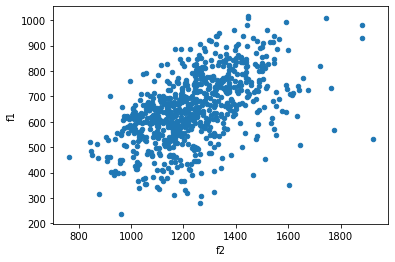

In [36]:
var1='f1'
var2 = 'f2'
data=pd.concat([extracted_df[var1], extracted_df[var2]],axis=1)
data.plot.scatter(x=var2,y=var1)

# Box Plot

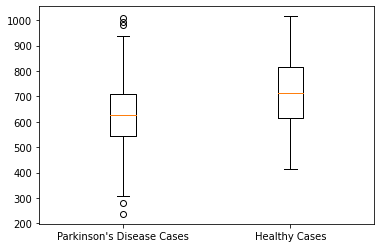

In [44]:
# Creating a box plot 
var='f1'
diseased_freq_avg = extracted_df[extracted_df["class"] == 1][var].values
healthy_freq_avg = extracted_df[extracted_df["class"] == 0][var].values

plt.boxplot([diseased_freq_avg, healthy_freq_avg])
plt.xticks([1, 2], ["Parkinson's Disease Cases", "Healthy Cases"])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


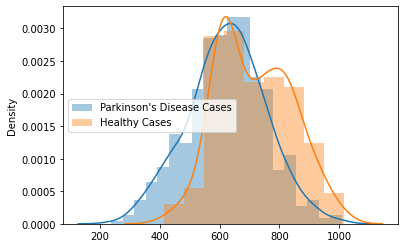

In [45]:
# Creating a distribution plot with histograms
sns.distplot(diseased_freq_avg, hist=True, label="Parkinson's Disease Cases")
sns.distplot(healthy_freq_avg, hist=True, label="Healthy Cases")
plt.legend()
plt.show()


# Correlation Matrix

<AxesSubplot:>

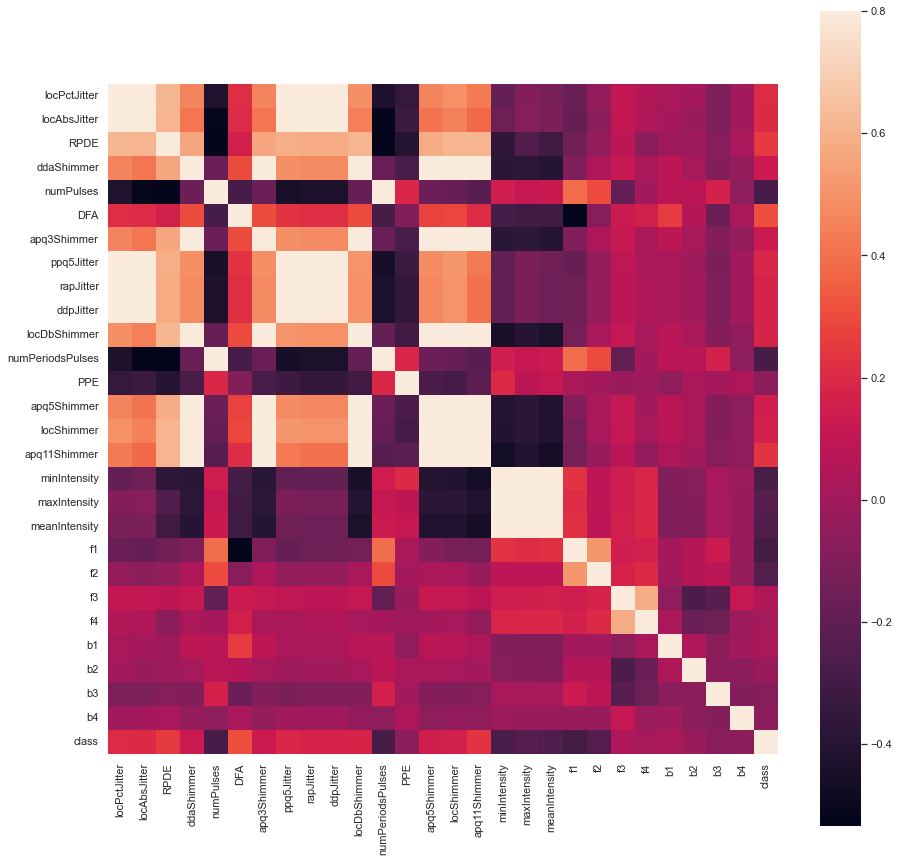

In [77]:
corrmat = extracted_df.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, vmax=.8 , square =True)

# Pair plot

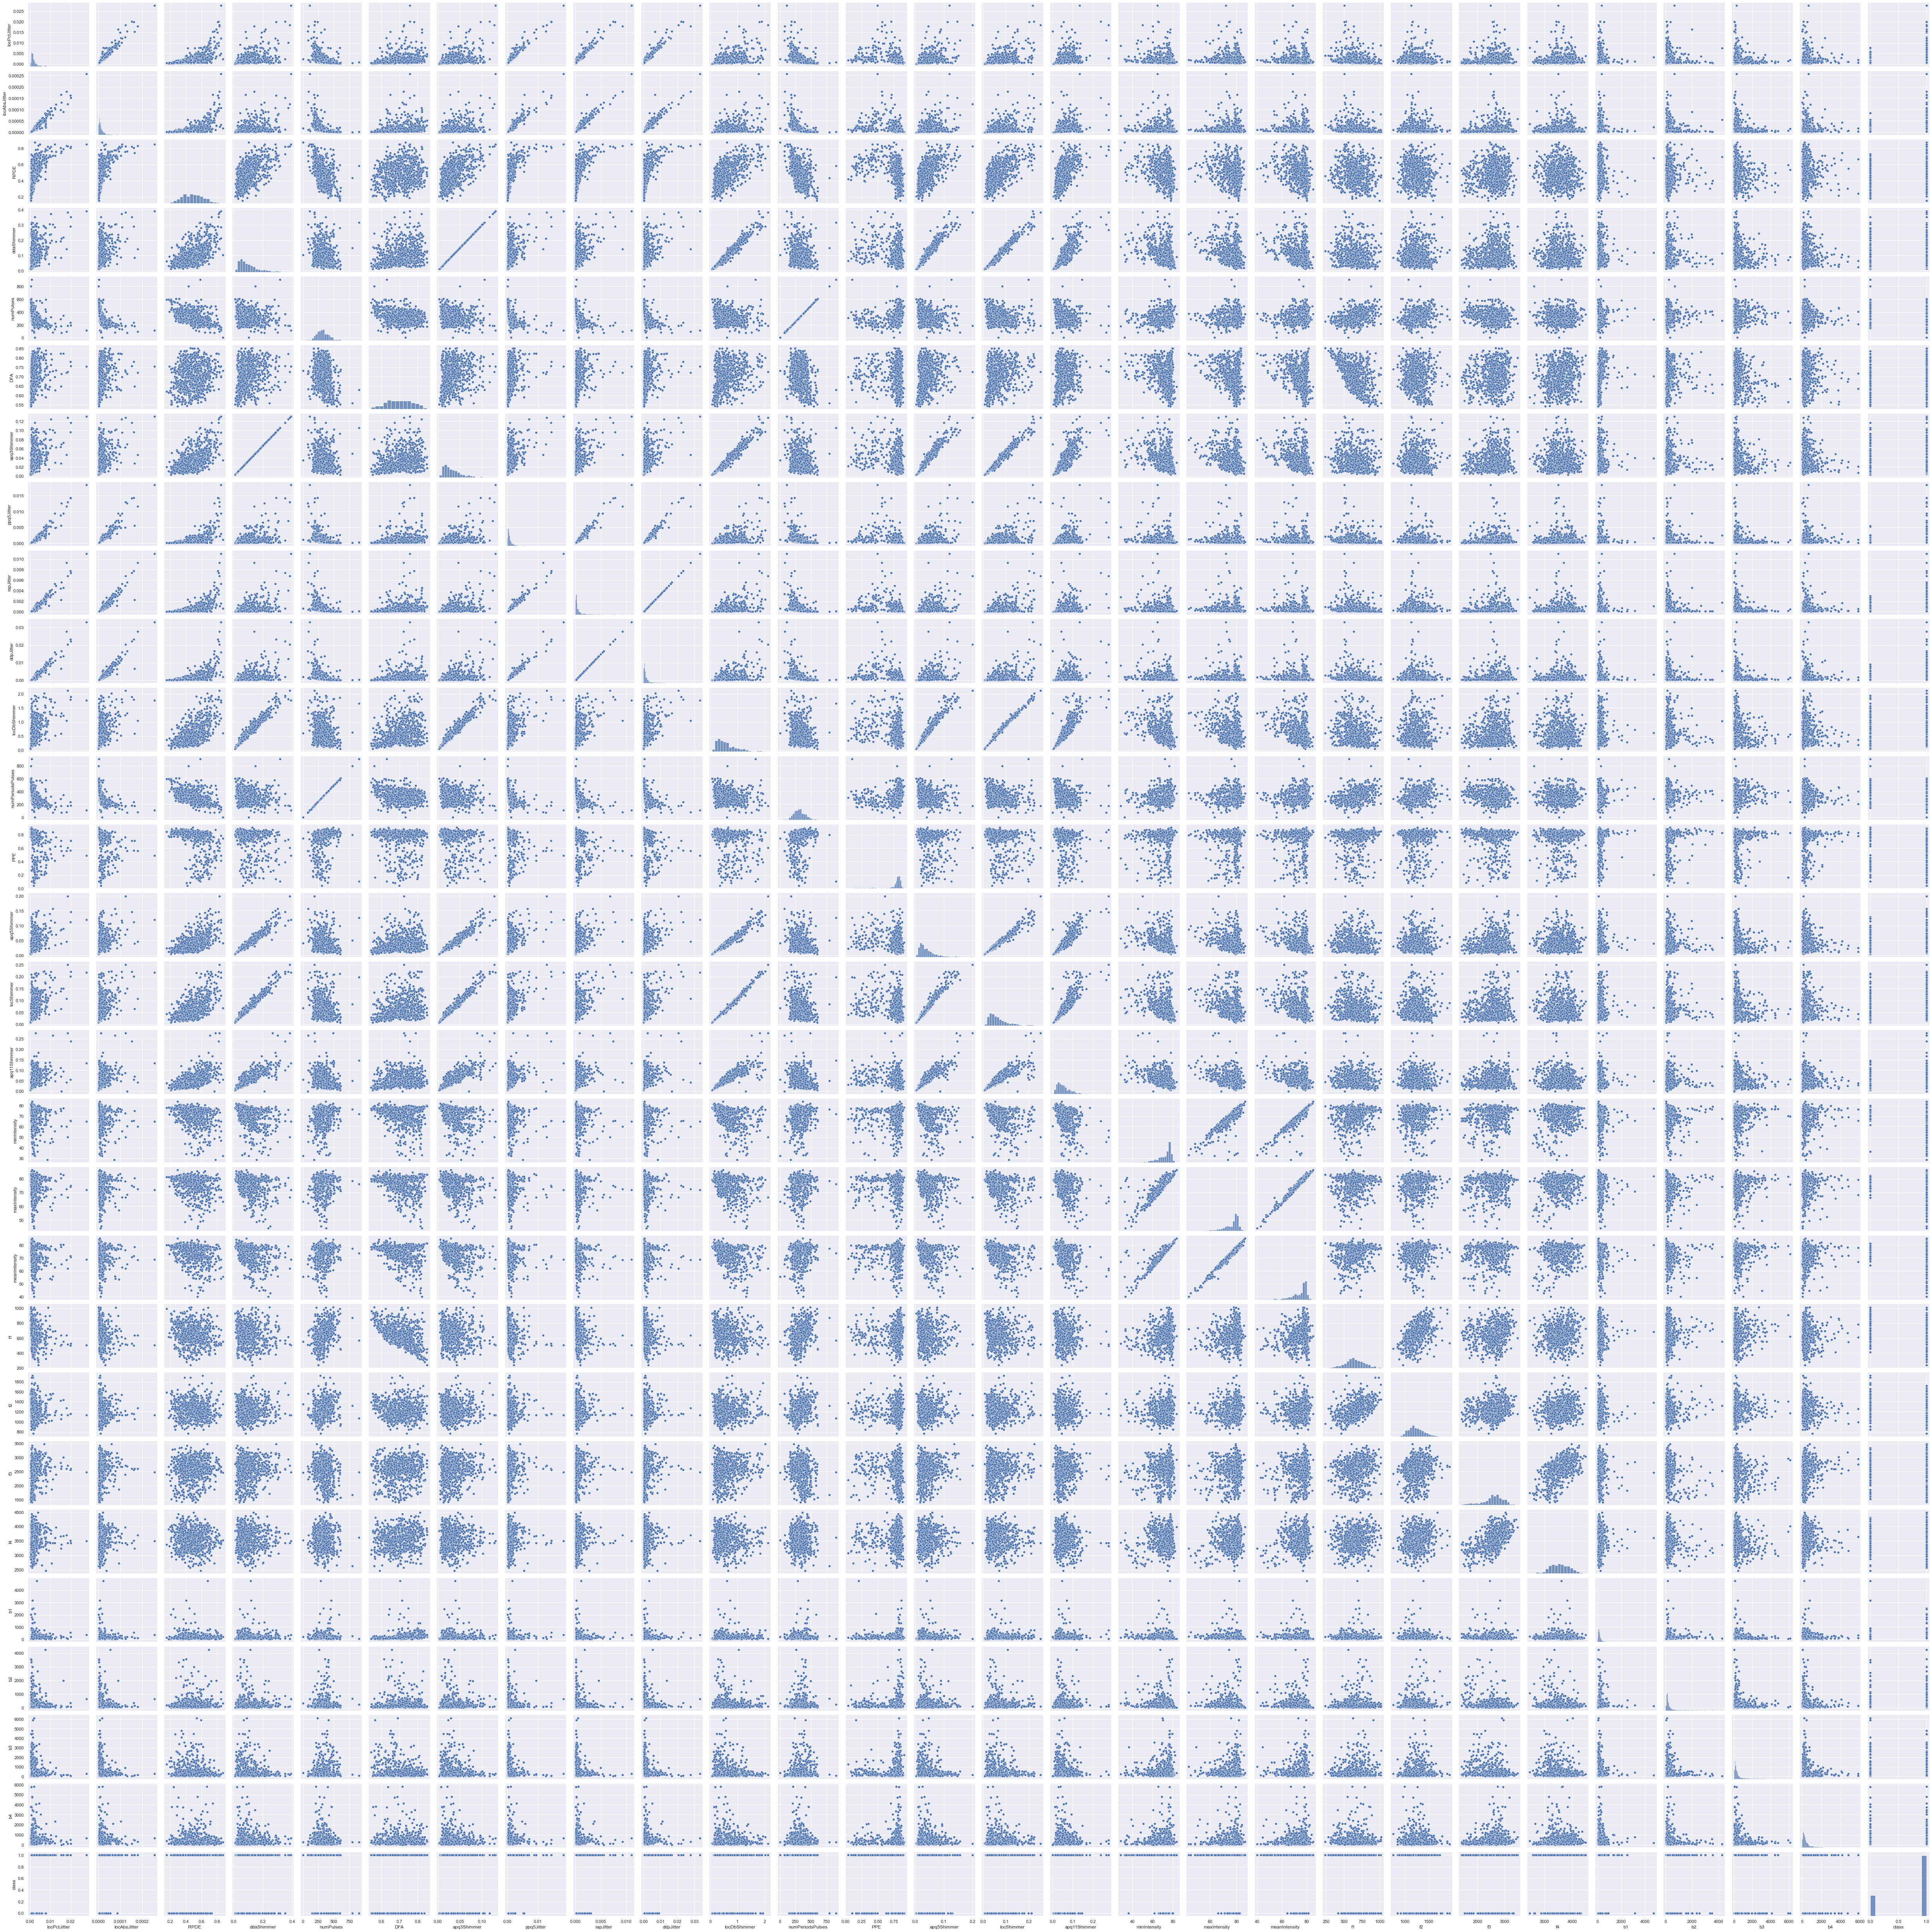

In [75]:
sns.set()
cols = ['locPctJitter', 'locAbsJitter', 'RPDE', 'ddaShimmer', 'numPulses',
       'DFA', 'apq3Shimmer', 'ppq5Jitter', 'rapJitter', 'ddpJitter',
       'locDbShimmer', 'numPeriodsPulses', 'PPE', 'apq5Shimmer', 'locShimmer',
       'apq11Shimmer', 'minIntensity', 'maxIntensity', 'meanIntensity', 'f1',
       'f2', 'f3', 'f4', 'b1', 'b2', 'b3', 'b4', 'class']
sns.pairplot(extracted_df[cols])
plt.show()